## Apply K-Means clustering on below dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('/home/admin1/PycharmProjects/Clustering datasets/')

# loading dataset from csv file & storing it as pandas dataframe
census_data = pd.read_csv('USCensus1990_data.csv')
census_data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [2]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
caseid       int64
dAge         int64
dAncstry1    int64
dAncstry2    int64
iAvail       int64
iCitizen     int64
iClass       int64
dDepart      int64
iDisabl1     int64
iDisabl2     int64
iEnglish     int64
iFeb55       int64
iFertil      int64
dHispanic    int64
dHour89      int64
dHours       int64
iImmigr      int64
dIncome1     int64
dIncome2     int64
dIncome3     int64
dIncome4     int64
dIncome5     int64
dIncome6     int64
dIncome7     int64
dIncome8     int64
dIndustry    int64
iKorean      int64
iLang1       int64
iLooking     int64
iMarital     int64
iMay75880    int64
iMeans       int64
iMilitary    int64
iMobility    int64
iMobillim    int64
dOccup       int64
iOthrserv    int64
iPerscare    int64
dPOB         int64
dPoverty     int64
dPwgt1       int64
iRagechld    int64
dRearning    int64
iRelat1      int64
iRelat2      int64
iRemplpar    int64
iRiders      

In [3]:
# taking only 00000 records
census_data = census_data.iloc[:10000]

#### Checking for null values

In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
caseid       10000 non-null int64
dAge         10000 non-null int64
dAncstry1    10000 non-null int64
dAncstry2    10000 non-null int64
iAvail       10000 non-null int64
iCitizen     10000 non-null int64
iClass       10000 non-null int64
dDepart      10000 non-null int64
iDisabl1     10000 non-null int64
iDisabl2     10000 non-null int64
iEnglish     10000 non-null int64
iFeb55       10000 non-null int64
iFertil      10000 non-null int64
dHispanic    10000 non-null int64
dHour89      10000 non-null int64
dHours       10000 non-null int64
iImmigr      10000 non-null int64
dIncome1     10000 non-null int64
dIncome2     10000 non-null int64
dIncome3     10000 non-null int64
dIncome4     10000 non-null int64
dIncome5     10000 non-null int64
dIncome6     10000 non-null int64
dIncome7     10000 non-null int64
dIncome8     10000 non-null int64
dIndustry    10000 non-null int64
iKorean 

#### Creating feature matrix

In [5]:
x_values = census_data.values 

### Finding optimal number of clusters using dendogram method

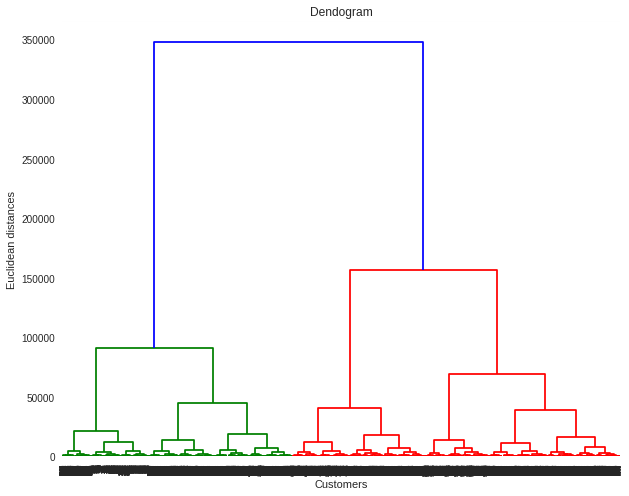

In [6]:
import scipy.cluster.hierarchy as sch

plt.style.use('seaborn')
plt.figure(figsize=(10,8))
dendogram = sch.dendrogram(sch.linkage(x_values, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### We can take 2 or 3 clusters, going with 3 clusters

### Creating 3 clusters using hierarchical clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

total_clusters = 3
agglo_clustering = AgglomerativeClustering(n_clusters=total_clusters, affinity='euclidean', linkage='ward')
predicted_clusters = agglo_clustering.fit_predict(x_values)

#### Total records in each cluster

In [8]:
for num in range(total_clusters):
    print(f'Number of records in Cluster {num + 1}: {len(predicted_clusters[predicted_clusters == num])}')

Number of records in Cluster 1: 4117
Number of records in Cluster 2: 3491
Number of records in Cluster 3: 2392
